### レポート課題

#### （１）Breast Cancer Wisconsinデータセットを用いて、ガン腫瘍の分類モデルを構築してください。
参考：https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## データの観察

In [2]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# breast_cancerデータセットの読み込み
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
columns = bc.feature_names
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
X = bc.data
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [6]:
y = bc.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
X_df = pd.DataFrame(X, columns = columns)
y_df = pd.DataFrame(y, columns = ['malignant'])
df = pd.concat([X_df, y_df], axis = 1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [70]:
import seaborn as sns
sns.pairplot(df, hue='malignant', height=2.0)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd99aa697b8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd99aaee510> (for post_execute):


KeyboardInterrupt: 

In [13]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')

## 前処理

In [14]:
#データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)m

## パーセプトロン

In [34]:
X_2 = X_std[:,[22,27]]
y_2 = y

In [35]:
# データの分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

In [69]:
print(X.shape)
print(y.shape)
print(X_2_train.shape)
print(y_2_train.shape)
print(X_2_test.shape)
print(y_2_test.shape)

(569, 30)
(569,)
(398, 2)
(398,)
(171, 2)
(171,)


In [36]:
# パーセプトロンの学習
from sklearn.linear_model import Perceptron
ppn_2 = Perceptron(eta0=0.1)
ppn_2.fit(X_2_train, y_2_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


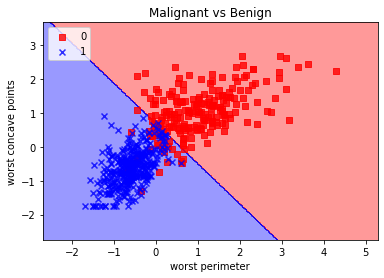

In [37]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_2, y_2, ppn_2)
plt.xlabel("worst perimeter")
plt.ylabel("worst concave points")
plt.legend(loc="upper left")
plt.title('Malignant vs Benign')
plt.show()

In [38]:
# 正答率を出力
print('train acc: %.3f' % ppn_2.score(X_2_train, y_2_train))
print('test acc: %.3f' % ppn_2.score(X_2_test, y_2_test))

train acc: 0.943
test acc: 0.947


In [39]:
# testデータのindexを指定
index = 1

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_2_test[index])
print('predict: %d' % ppn_2.predict(X_2_test[index].reshape(1, -1)))

answer : 1
predict: 1


## SVC

In [34]:
X_2 = X_std[:,[22,27]]
y_2 = y

In [47]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
scaler_2.fit(X_2)
X_2_std = scaler.transform(X_2)

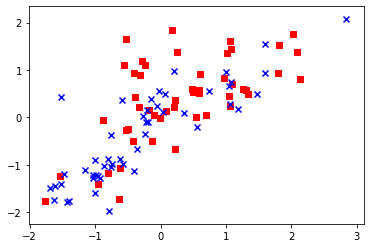

In [48]:
# 散布図を出力
plt.scatter(X_2_std[:50, [0]], X_2_std[:50, [1]], color='red', marker='s')
plt.scatter(X_2_std[50:100, [0]], X_2_std[50:100, [1]], color='blue', marker='x')
plt.show()

In [49]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_std, y_2, test_size=0.3, random_state=0)

In [50]:
# 線形SVCの学習
from sklearn.svm import SVC
# Cは正則化項、小さくするほど誤分類を許容
svc_slack = SVC(kernel='linear', C=1.0)
svc_slack.fit(X_2_train, y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


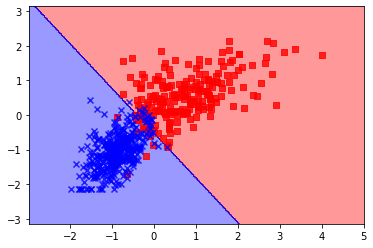

In [51]:
# 決定境界の出力
plot_decision_regions(X_2_std, y_2, svc_slack)

In [75]:
# 正答率を出力
print(svc_slack.score(X_2_train, y_2_train))
print(svc_slack.score(X_2_test, y_2_test))

0.9396984924623115
0.935672514619883


## カーネルSVM

In [77]:
# カーネルSVMによる学習
# C: 誤分類への厳しさ
# gamma: 決定曲線の複雑さ
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=10)
rbf_svm.fit(X_2_train, y_2_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


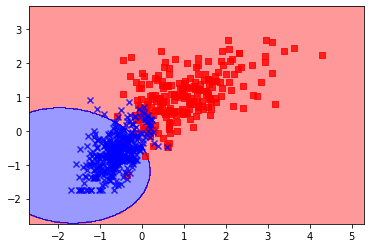

In [78]:
# 決定曲線のプロット
plot_decision_regions(X_2, y_2, classifier=rbf_svm)

In [82]:
rbf_svm.score(X_2_test, y_2_test)

0.9473684210526315

In [83]:
# 調整したいパラメータを指定
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [84]:
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [85]:
# GridSearchCVのインスタンスを生成
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5)

In [86]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
gs_svc.fit(X_2_train, y_2_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
# test精度の平均が最も高かった組み合わせを出力
gs_svc.best_params_

{'C': 1.0, 'gamma': 0.01}

In [88]:
# そのときのtest精度の平均を出力
gs_svc.best_score_

0.9422110552763819

In [89]:
# ホールド・アウト法によるtest精度を出力
gs_svc.score(X_2_test, y_2_test)

0.9415204678362573

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


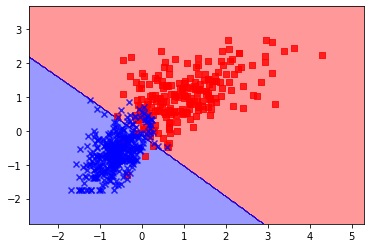

In [90]:
# 決定境界の出力
plot_decision_regions(X_2, y_2, gs_svc)

#### （２）モデルを選んだ理由とその根拠を述べてください。（評価指標や可視化の結果などを基に述べると良い）（100字程度）

malignant との相関係数が高い順に二つを説明変数においた。(worst perimeter,worst concave points)
パーセプトロンと線形SVM、カーネルSVMを実行し、テストデータにおける正答率の高いパーセプトロンのモデルがよりよいと判断した。
trainデータとtestデータの間に正答率の差がそれほどなく、過学習も見受けられなかった。

#### （３）ガン腫瘍の分類モデルとして、医療の現場で実際に用いる場合の問題点を述べてください。（100字程度）
※問題点がなければ有効性の根拠を述べてください。

医療の現場でプロなら誰でもわかっているような当たり前のことをデータを使って表しているに過ぎない（のかもしれないと思った）
説明変数として2つの指標を相関係数をもとに選んだが、選ぶ指標が多くなるほどモデルの複雑性が増し実用性にかける
また、様々な指標を用いた総合的な判断に用いるのは難しい

感想：　散布図行列とヒートマップが動かなかった。
抽出する変数を絞れば良いのだろうと重い、前回のものを見て locを用いれば良いのだろうと思ったが、うまくいかなかった。
help() を使ってseaborn　を調べたが、pairolotが出てこず、諦めた。　hue=　が意味していることがわからなかった。

## ----------------------------------------------------------

## ↓　試行錯誤スペース

In [26]:
X_1 = X_std[0:100,[22,27]]
y_1 = y[:100]

In [27]:
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [28]:
print(X.shape)
print(y.shape)
print(X_1_train.shape)
print(y_1_train.shape)
print(X_1_test.shape)
print(y_1_test.shape)

(569, 30)
(569,)
(70, 2)
(70,)
(30, 2)
(30,)


## パーセプトロンを用いた２クラス分類

In [29]:
from sklearn.linear_model import Perceptron
#eta0 →学習率（関数を動かす幅）
ppn_1 = Perceptron(eta0=0.1)
ppn_1.fit(X_1_train, y_1_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
# ２次元データの決定曲線をプロットする関数
# (X, y, 分類器)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


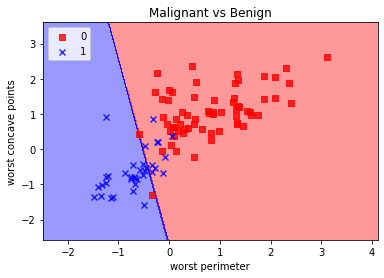

In [31]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_1, y_1, ppn_1)
plt.xlabel("worst perimeter")
plt.ylabel("worst concave points")
plt.legend(loc="upper left")
plt.title('Malignant vs Benign')
plt.show()

In [32]:
# 正答率を出力
print('train acc: %.3f' % ppn_1.score(X_1_train, y_1_train))
print('test acc: %.3f' % ppn_1.score(X_1_test, y_1_test))

train acc: 0.871
test acc: 0.933


In [33]:
# testデータのindexを指定
index = 2

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_1_test[index])
print('predict: %d' % ppn_1.predict(X_1_test[index].reshape(1, -1)))

answer : 0
predict: 0


## 多クラス分類

In [26]:
X_1 = X_std[0:100,[22,27]]
y_1 = y[:100]

In [27]:
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [28]:
print(X.shape)
print(y.shape)
print(X_1_train.shape)
print(y_1_train.shape)
print(X_1_test.shape)
print(y_1_test.shape)

(569, 30)
(569,)
(70, 2)
(70,)
(30, 2)
(30,)


## パーセプトロンを用いた２クラス分類

In [29]:
from sklearn.linear_model import Perceptron
#eta0 →学習率（関数を動かす幅）
ppn_1 = Perceptron(eta0=0.1)
ppn_1.fit(X_1_train, y_1_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
# ２次元データの決定曲線をプロットする関数
# (X, y, 分類器)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


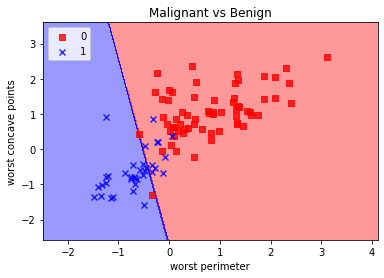

In [31]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_1, y_1, ppn_1)
plt.xlabel("worst perimeter")
plt.ylabel("worst concave points")
plt.legend(loc="upper left")
plt.title('Malignant vs Benign')
plt.show()

In [32]:
# 正答率を出力
print('train acc: %.3f' % ppn_1.score(X_1_train, y_1_train))
print('test acc: %.3f' % ppn_1.score(X_1_test, y_1_test))

train acc: 0.871
test acc: 0.933


In [33]:
# testデータのindexを指定
index = 2

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_1_test[index])
print('predict: %d' % ppn_1.predict(X_1_test[index].reshape(1, -1)))

answer : 0
predict: 0


## 多クラス分類

In [26]:
X_1 = X_std[0:100,[22,27]]
y_1 = y[:100]

In [27]:
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [28]:
print(X.shape)
print(y.shape)
print(X_1_train.shape)
print(y_1_train.shape)
print(X_1_test.shape)
print(y_1_test.shape)

(569, 30)
(569,)
(70, 2)
(70,)
(30, 2)
(30,)


## パーセプトロンを用いた２クラス分類

In [29]:
from sklearn.linear_model import Perceptron
#eta0 →学習率（関数を動かす幅）
ppn_1 = Perceptron(eta0=0.1)
ppn_1.fit(X_1_train, y_1_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
# ２次元データの決定曲線をプロットする関数
# (X, y, 分類器)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


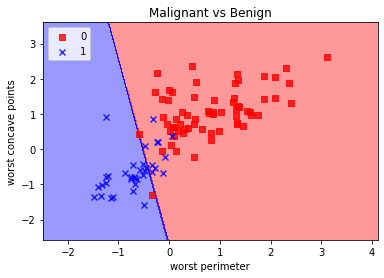

In [31]:
# 散布図上に決定曲線を出力
plot_decision_regions(X_1, y_1, ppn_1)
plt.xlabel("worst perimeter")
plt.ylabel("worst concave points")
plt.legend(loc="upper left")
plt.title('Malignant vs Benign')
plt.show()

In [32]:
# 正答率を出力
print('train acc: %.3f' % ppn_1.score(X_1_train, y_1_train))
print('test acc: %.3f' % ppn_1.score(X_1_test, y_1_test))

train acc: 0.871
test acc: 0.933


In [33]:
# testデータのindexを指定
index = 2

# 正解と予測のクラスラベルを出力
print('answer : %d' % y_1_test[index])
print('predict: %d' % ppn_1.predict(X_1_test[index].reshape(1, -1)))

answer : 0
predict: 0


In [42]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

In [43]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_std, y_1, test_size=0.3, random_state=0)

In [44]:
# 線形SVCの学習
from sklearn.svm import SVC
#　Cは正則化項、小さくするほど誤分類を許容
svc = SVC(kernel='linear')
svc.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


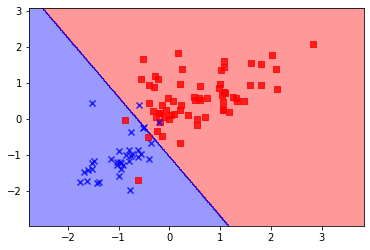

In [45]:
# 決定曲線をプロット
plot_decision_regions(X_1_std, y_1, svc)

In [46]:
# 正答率を出力
svc.score(X_1_test, y_1_test)

1.0